In [347]:
import pandas as pd
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

import wordninja
import regex as re
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS as stopwords
from nltk.corpus import stopwords

In [348]:
l_data = pd.read_csv('../data/liberal_results_df.csv')
c_data = pd.read_csv('../data/conservative_results.csv')               




In [349]:

l_data.drop(l_data.index[[1741]], inplace=True)


In [350]:
l_data['selftext'] = l_data['selftext'].fillna('[removed]')
c_data['selftext'] = c_data['selftext'].fillna('[removed]')


In [351]:
l_data['selftext'] = l_data['selftext'].apply(lambda x : x.replace('[removed]',''))
c_data['selftext'] = c_data['selftext'].apply(lambda x : x.replace('[removed]',''))


In [352]:
l_data['fulltext'] = l_data['title'] + ' ' + l_data['selftext']
c_data['fulltext'] = c_data['title'] + ' ' + c_data['selftext']


In [353]:
c_categorical_nums = {"subreddit": {'Conservative': 1}}
l_categorical_nums = {"subreddit": {'Liberal': 0}}
c_data.replace(c_categorical_nums, inplace=True)
l_data.replace(l_categorical_nums, inplace=True)

In [354]:
def remove_links(data,col):
    string = []
    remove_links = []
    for i in data[col]:
            string.append(str(i))
    for k in string:
            remove_links.append(re.sub(r'\b(?:(?:https|http)://)?\w[\w-]+(?:\.[\w-]+)+\S*','', k))
    return remove_links
c_data['fulltext'] = remove_links(c_data,'fulltext')

In [355]:
def only_letters(data,col):
    letters = []
    for i in data[col]:
        letters.append(re.sub(r'[^A-Za-z0-9 ]+', "", i))
    return letters
l_data['fulltext'] = only_letters(l_data,'fulltext')
c_data['fulltext'] = only_letters(c_data,'fulltext')



In [356]:
#c_data['fulltext'] = df['fulltext'].where((df['fulltext'].str.len() == 4))
 

        

In [357]:
def make_str_remove_non_letters_lower(data,col):
    string = []
    for i in data[col]:
        string.append(str(i))
     
    letters = []
    for i in string:
        letters.append(re.sub(r'[^A-Za-z0-9 ]+', '', i))
    lower = []
    for i in letters:
        lower.append(i.lower())
    return lower
l_data['fulltext'] = make_str_remove_non_letters_lower(l_data,'fulltext')
c_data['fulltext'] = make_str_remove_non_letters_lower(c_data,'fulltext')

    


In [358]:
def remove_number(data,col):
    num_list = ['0','1','2','3','4','5','6','7','8','9']
    for i in data[col]:
    
        for i in num_list:
            for j in i:
                for k in num_list:
                    if k in j:
                        data[col]= data[col].apply(lambda x : x.replace(j,''))
remove_number(c_data,'fulltext')
remove_number(l_data,'fulltext')
           

In [359]:
cvec = CountVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = 'english',
                             max_features = 50000)

In [360]:
l_data = cvec.fit_transform(l_data['fulltext'])
l_df = pd.DataFrame(l_data.toarray(),
                          columns=cvec.get_feature_names())


In [361]:
c_data = cvec.fit_transform(c_data['fulltext'])
c_df = pd.DataFrame(c_data.toarray(),
                          columns=cvec.get_feature_names())

In [362]:
c_df.shape

(1422, 10376)

In [364]:
l_df.shape

(1741, 11072)

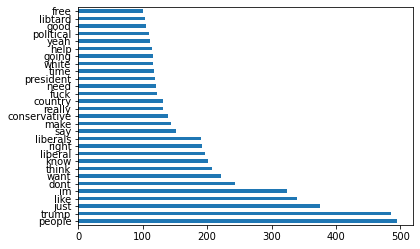

In [367]:
l_df.sum()[l_df.sum()>=100].sort_values(ascending=False).plot(kind='barh')

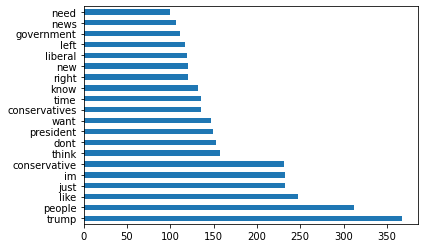

In [368]:
c_df.sum()[c_df.sum()>=100].sort_values(ascending=False).plot(kind='barh')

In [ ]:
#full_df = pd.concat([liberal_df, conservative_df],axis = 1)

In [ ]:
liberal_df.sum()[liberal_df.sum()>=400].sort_values(ascending=False).plot(kind='barh')

In [ ]:
full_df.shape

In [ ]:
X = full_df['full_text']
y = full_df['subreddit']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    stratify=y,
                                                    random_state=42)

In [ ]:
y_test